In [745]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
df=pd.read_csv('customer_booking.csv',encoding="ISO-8859-1")

In [62]:
df.sample(3)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
24236,1,Internet,RoundTrip,43,18,2,Wed,PUSSUB,Indonesia,0,0,0,6.33,1
11633,1,Internet,RoundTrip,0,38,7,Wed,HKGPER,Hong Kong,1,0,0,5.62,0
20886,3,Internet,RoundTrip,209,60,6,Sat,MELTRZ,Australia,1,1,1,8.83,0


In [64]:
len(df.booking_complete)/len(df[df.booking_complete==0])
#we see that only 1.2% of people book the flight

1.175861906777668

In [66]:
df.sales_channel.unique()

array(['Internet', 'Mobile'], dtype=object)

# EDA

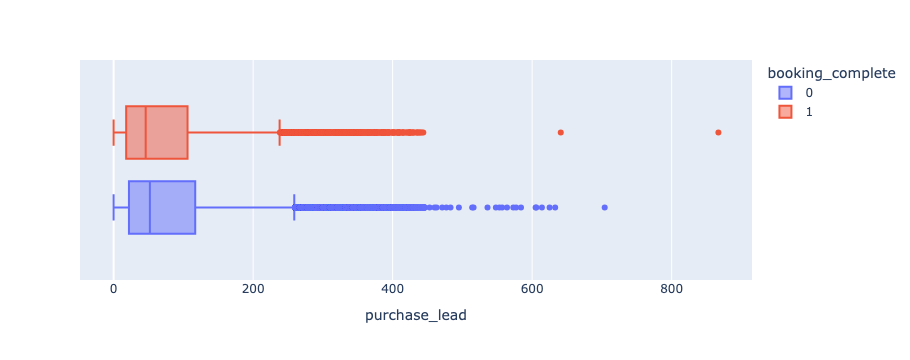

In [687]:
#box plot
px.box(df,df.purchase_lead,color='booking_complete')

In [701]:
#outlier exists, purchase_lead above 250, so lets remove them

In [723]:
#removed outliers
df=df[df['purchase_lead']<250]

In [725]:
len(df)

46260

In [757]:
df=df.drop(columns=['flight_day_no'])

In [759]:
num_cols=df.select_dtypes(include=np.number).columns

In [777]:
cols=df.columns.tolist()

In [785]:
cor=df[cols].corr()

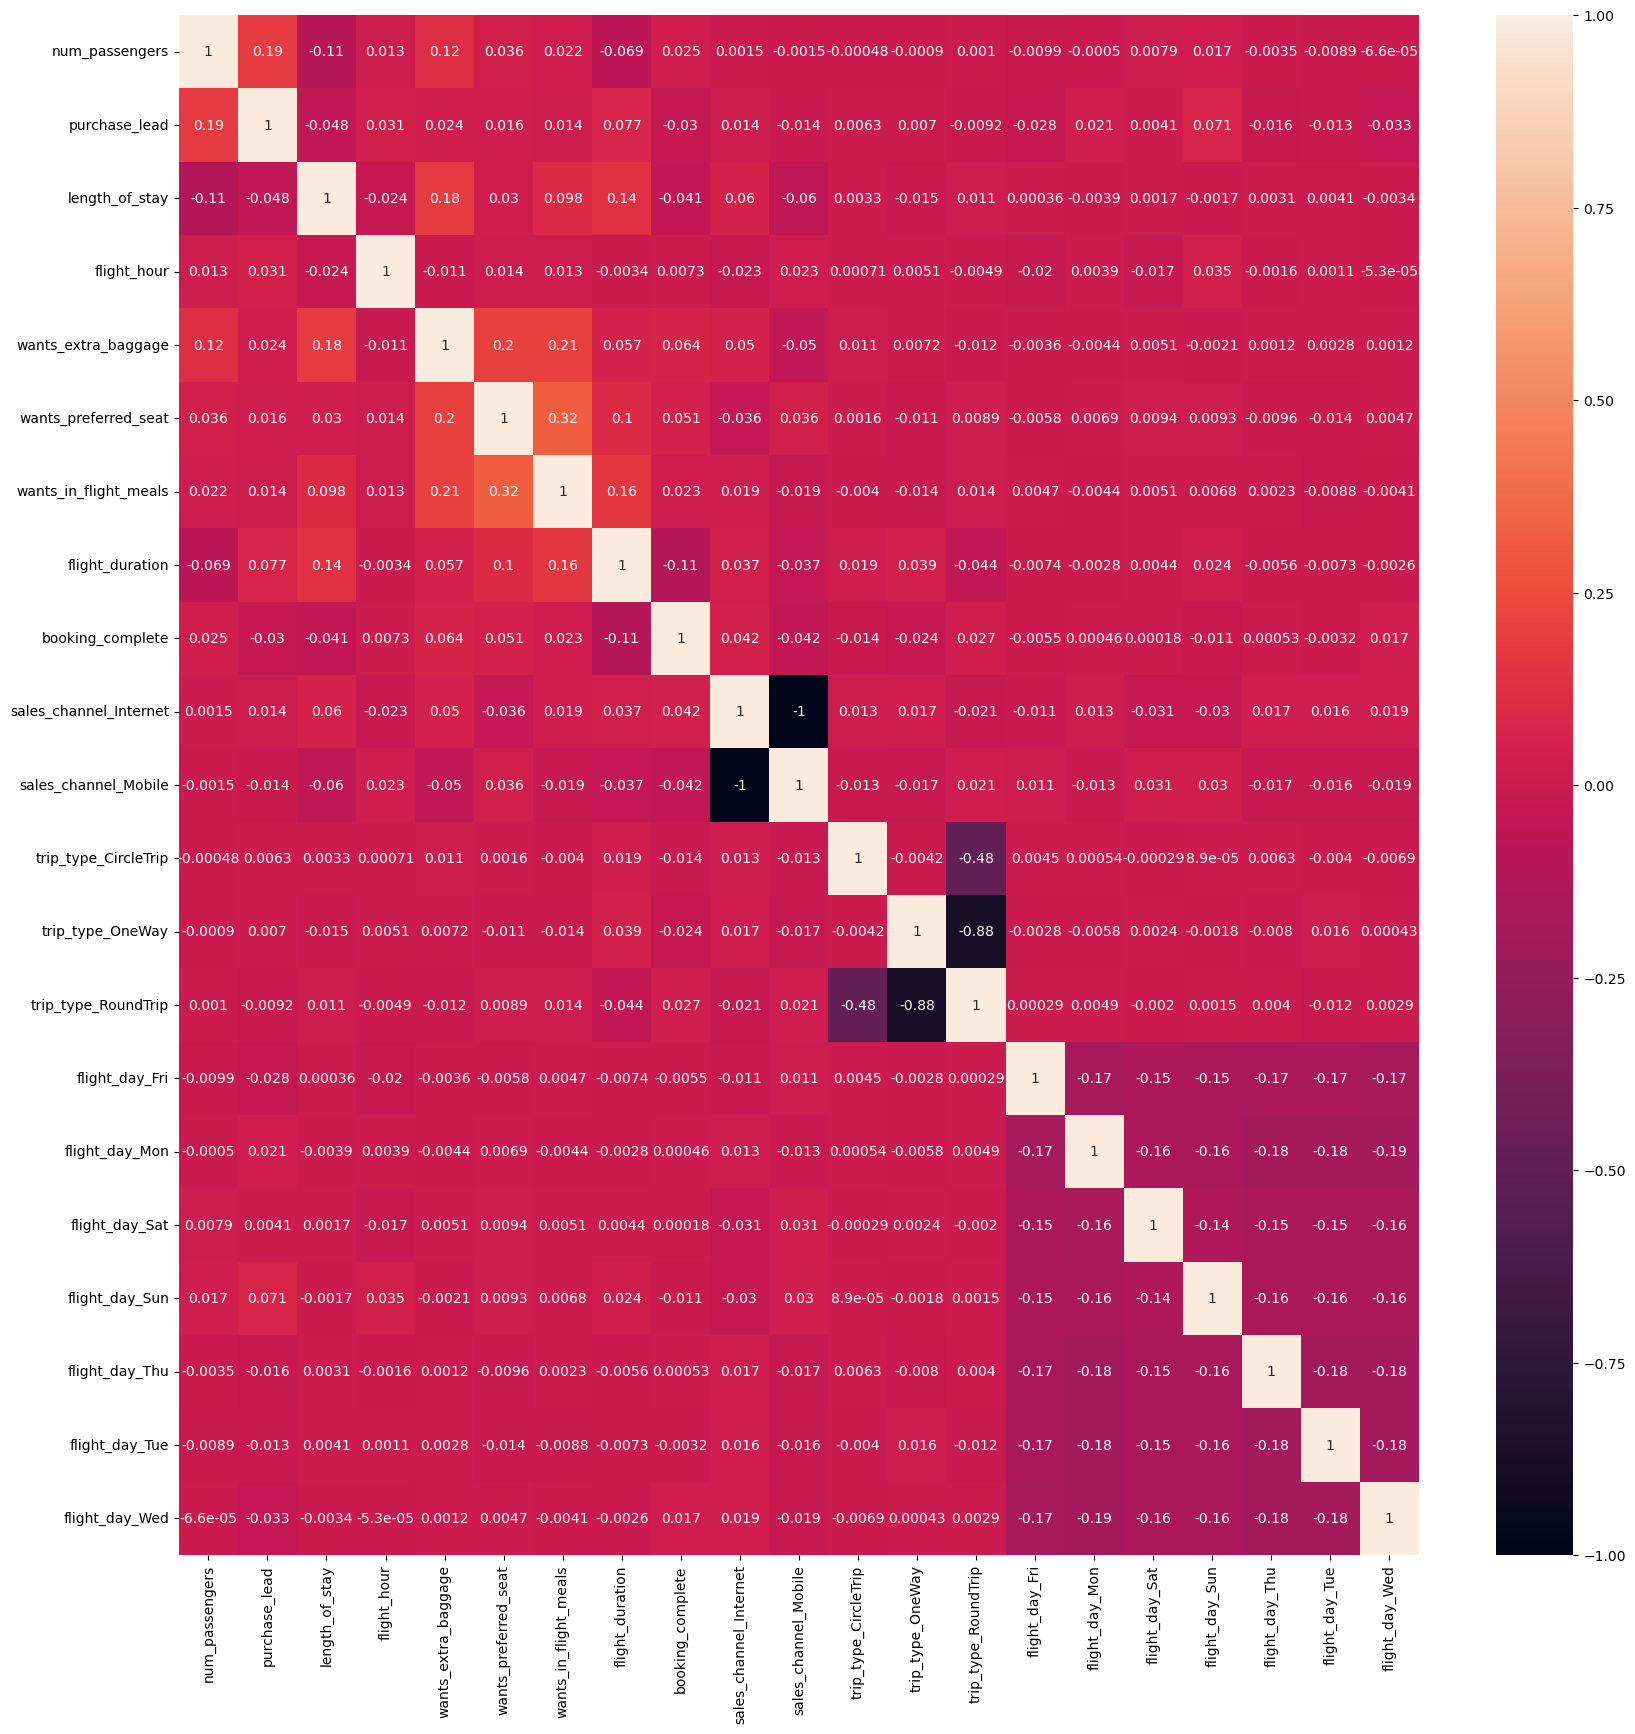

In [789]:
plt.figure(figsize=(20,20))
sns.heatmap(cor,annot=True)
plt.show()

## majority of the bookings were made by 'single' passengers

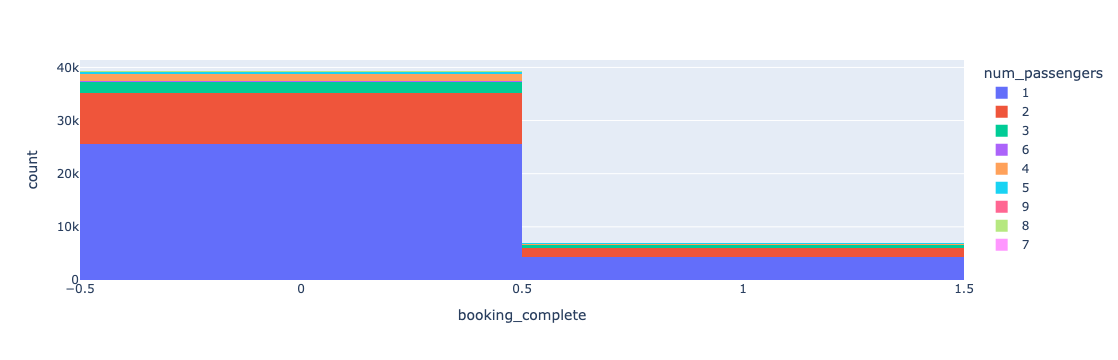

In [791]:
px.histogram(df,x=df.booking_complete,color='num_passengers')

In [793]:
df.columns

Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
       'flight_duration', 'booking_complete', 'sales_channel_Internet',
       'sales_channel_Mobile', 'trip_type_CircleTrip', 'trip_type_OneWay',
       'trip_type_RoundTrip', 'flight_day_Fri', 'flight_day_Mon',
       'flight_day_Sat', 'flight_day_Sun', 'flight_day_Thu', 'flight_day_Tue',
       'flight_day_Wed'],
      dtype='object')

## we have normal distribution for 'fight_hour'

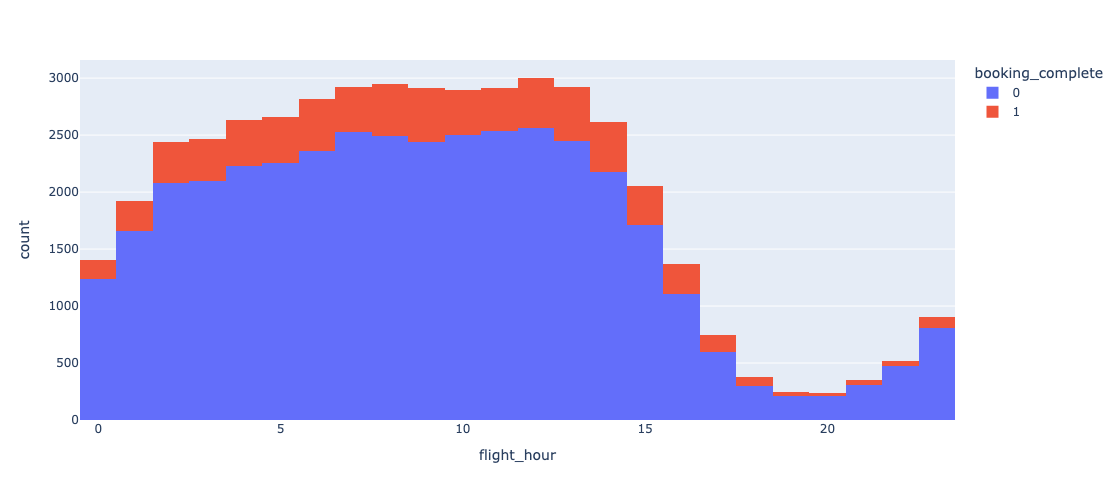

In [796]:
px.histogram(df,x='flight_hour',color='booking_complete',height=500)


# Feature Engineering

In [799]:
cat_cols=df.select_dtypes(include=object).columns

In [801]:
cat_cols

Index([], dtype='object')

In [803]:
df[cat_cols].sample(5)

""
8005
18237
3664
48691
13458


In [807]:
num_cols=df.select_dtypes(include=np.number).columns

In [811]:
df[num_cols].corr()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Internet,...,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,flight_day_Fri,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed
num_passengers,1.000000,0.187031,-0.112122,0.012903,0.123082,0.036430,0.022489,-0.069200,0.025082,0.001486,...,-0.000481,-0.000905,0.001027,-0.009912,-0.000497,0.007893,0.017012,-0.003529,-0.008911,-0.000066
purchase_lead,0.187031,1.000000,-0.047939,0.031306,0.023727,0.015823,0.013565,0.077180,-0.030210,0.014197,...,0.006265,0.006999,-0.009164,-0.027861,0.020759,0.004134,0.071056,-0.016019,-0.012959,-0.033435
length_of_stay,-0.112122,-0.047939,1.000000,-0.023726,0.180499,0.029733,0.098192,0.137207,-0.041197,0.059846,...,0.003325,-0.014585,0.011215,0.000362,-0.003947,0.001697,-0.001699,0.003054,0.004099,-0.003434
flight_hour,0.012903,0.031306,-0.023726,1.000000,-0.011235,0.013646,0.013050,-0.003371,0.007314,-0.023032,...,0.000715,0.005147,-0.004866,-0.020337,0.003925,-0.017292,0.034545,-0.001646,0.001109,-0.000053
wants_extra_baggage,0.123082,0.023727,0.180499,-0.011235,1.000000,0.204498,0.210164,0.057294,0.064136,0.049949,...,0.010817,0.007170,-0.011504,-0.003646,-0.004433,0.005150,-0.002129,0.001247,0.002836,0.001245
wants_preferred_seat,0.036430,0.015823,0.029733,0.013646,0.204498,1.000000,0.320987,0.101218,0.050640,-0.036196,...,0.001603,-0.010983,0.008879,-0.005751,0.006950,0.009449,0.009279,-0.009574,-0.013540,0.004698
wants_in_flight_meals,0.022489,0.013565,0.098192,0.013050,0.210164,0.320987,1.000000,0.158760,0.022556,0.018938,...,-0.004041,-0.013669,0.013954,0.004664,-0.004429,0.005060,0.006835,0.002272,-0.008794,-0.004133
flight_duration,-0.069200,0.077180,0.137207,-0.003371,0.057294,0.101218,0.158760,1.000000,-0.108018,0.037156,...,0.018931,0.039310,-0.043648,-0.007374,-0.002760,0.004401,0.023519,-0.005609,-0.007261,-0.002595
booking_complete,0.025082,-0.030210,-0.041197,0.007314,0.064136,0.050640,0.022556,-0.108018,1.000000,0.042405,...,-0.013669,-0.023536,0.027257,-0.005460,0.000461,0.000179,-0.010590,0.000532,-0.003232,0.016810
sales_channel_Internet,0.001486,0.014197,0.059846,-0.023032,0.049949,-0.036196,0.018938,0.037156,0.042405,1.000000,...,0.012719,0.017109,-0.021152,-0.010888,0.012853,-0.030799,-0.029930,0.017237,0.015744,0.018967


In [813]:
df.columns

Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
       'flight_duration', 'booking_complete', 'sales_channel_Internet',
       'sales_channel_Mobile', 'trip_type_CircleTrip', 'trip_type_OneWay',
       'trip_type_RoundTrip', 'flight_day_Fri', 'flight_day_Mon',
       'flight_day_Sat', 'flight_day_Sun', 'flight_day_Thu', 'flight_day_Tue',
       'flight_day_Wed'],
      dtype='object')

# lets encode catagorical cols

In [816]:
from sklearn.preprocessing import OneHotEncoder

In [818]:
encoder=OneHotEncoder(sparse_output=False,handle_unknown='ignore')

In [820]:
cat_cols

Index([], dtype='object')

In [822]:
enc_cols=['sales_channel', 'trip_type', 'flight_day']

In [ ]:
encoder.fit(df[enc_cols])

In [295]:
encoded_cols=encoder.get_feature_names_out(enc_cols).tolist()

In [297]:
encoded_cols

['sales_channel_Internet',
 'sales_channel_Mobile',
 'trip_type_CircleTrip',
 'trip_type_OneWay',
 'trip_type_RoundTrip',
 'flight_day_Fri',
 'flight_day_Mon',
 'flight_day_Sat',
 'flight_day_Sun',
 'flight_day_Thu',
 'flight_day_Tue',
 'flight_day_Wed']

In [ ]:
df[encoded_cols]=encoder.transform(df[enc_cols])

In [309]:
df=df.drop(columns=cat_cols)

In [313]:
df.sample(3)

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,flight_day_no,...,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,flight_day_Fri,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed
26258,2,52,2,0,1,1,0,8.83,0,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
27767,1,54,3,10,0,1,0,7.57,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
25737,1,149,2,13,0,0,1,7.00,0,3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


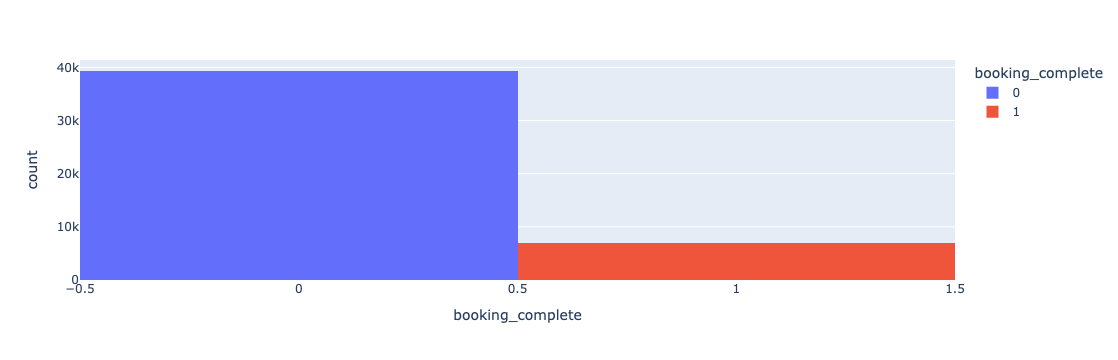

In [830]:
px.histogram(df,x=df.booking_complete,color='booking_complete')


In [828]:
df.columns

Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
       'flight_duration', 'booking_complete', 'sales_channel_Internet',
       'sales_channel_Mobile', 'trip_type_CircleTrip', 'trip_type_OneWay',
       'trip_type_RoundTrip', 'flight_day_Fri', 'flight_day_Mon',
       'flight_day_Sat', 'flight_day_Sun', 'flight_day_Thu', 'flight_day_Tue',
       'flight_day_Wed'],
      dtype='object')

In [839]:
input_cols=['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
       'flight_duration',
       'sales_channel_Internet', 'sales_channel_Mobile',
       'trip_type_CircleTrip', 'trip_type_OneWay', 'trip_type_RoundTrip',
       'flight_day_Fri', 'flight_day_Mon', 'flight_day_Sat', 'flight_day_Sun',
       'flight_day_Thu', 'flight_day_Tue', 'flight_day_Wed']

In [841]:
from sklearn.model_selection import train_test_split

## splitting the data into test and train

In [844]:
x_train,x_test,y_train,y_test=train_test_split(df[input_cols],df[target_col],test_size=0.2,random_state=42)

In [846]:
x_train.sample(4)

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,flight_day_Fri,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed
27458,1,57,3,5,0,0,0,6.42,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
49850,1,19,6,10,0,1,1,4.67,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
27511,1,34,3,6,0,0,0,8.83,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
39821,4,77,5,7,1,1,1,4.67,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# As our target column is 0 or 1 (categorical) we shall use a classifier model

## Lets use decision tree

In [850]:
from sklearn.tree import DecisionTreeClassifier

In [852]:
model=DecisionTreeClassifier(random_state=42)

In [854]:
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [856]:
model.score(x_train,y_train)
#traiing -> score

0.9997568093385214

In [858]:
model.score(x_test,y_test)
#test score

0.7568093385214008

In [860]:
#lets tune parameters

In [862]:
model.get_depth()

34

In [864]:
model=DecisionTreeClassifier(random_state=42,max_depth=15)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=15, random_state=42)

In [866]:
model.score(x_train,y_train)

0.9047233030696066

In [868]:
model.score(x_test,y_test)


0.8123648940769563

In [874]:
# we see that we got a score of 81%

# Lets use random forest

In [878]:
from sklearn.ensemble import RandomForestClassifier

In [880]:
model=RandomForestClassifier(random_state=42,n_jobs=-1)

In [882]:
model.fit(x_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [884]:
model.score(x_train,y_train)

0.9997027669693039

In [886]:
model.score(x_test,y_test)
#with random forst we achived 85% accuracy

0.8479247730220493

In [888]:
# parameter tunning

In [1096]:
model2=RandomForestClassifier(random_state=42,n_jobs=-1,n_estimators=200,max_depth=20,min_samples_split=5)
model2.fit(x_train,y_train)

RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [1098]:
model2.score(x_train,y_train)

0.8992380025940337

In [1100]:
model2.score(x_test,y_test)


0.8493298746217034

# using xgboost

In [898]:
from xgboost import XGBClassifier

In [1042]:
model=XGBClassifier(n_jobs=-1,random_state=42)

In [1038]:
model.fit(x_train,y_train)
model.score(x_train,y_train)

0.8809176394293126

In [1040]:
model.score(x_test,y_test)

0.8412235192390835

In [904]:
model=XGBClassifier(n_jobs=-1,random_state=42,n_estimators=200,learning_rate=0.25)
model.fit(x_train,y_train)
model.score(x_train,y_train)

0.8800259403372244

In [906]:
model.score(x_test,y_test)

0.8433852140077821

In [1094]:
# Feature Importance

In [1104]:
imp=model2.feature_importances_

In [1106]:
feature_df=pd.DataFrame({
    'Feature':x_train.columns.tolist(),
    'Importance':imp
})

In [1108]:
top_fet=feature_df.sort_values(by='Importance',ascending=False)

In [1114]:
fets=top_fet.head(10)

In [1132]:
fets

,Feature,Importance
1,purchase_lead,0.250023
3,flight_hour,0.181551
2,length_of_stay,0.175714
7,flight_duration,0.149899
0,num_passengers,0.060087
6,wants_in_flight_meals,0.025746
4,wants_extra_baggage,0.019506
5,wants_preferred_seat,0.018922
17,flight_day_Thu,0.015119
18,flight_day_Tue,0.015067


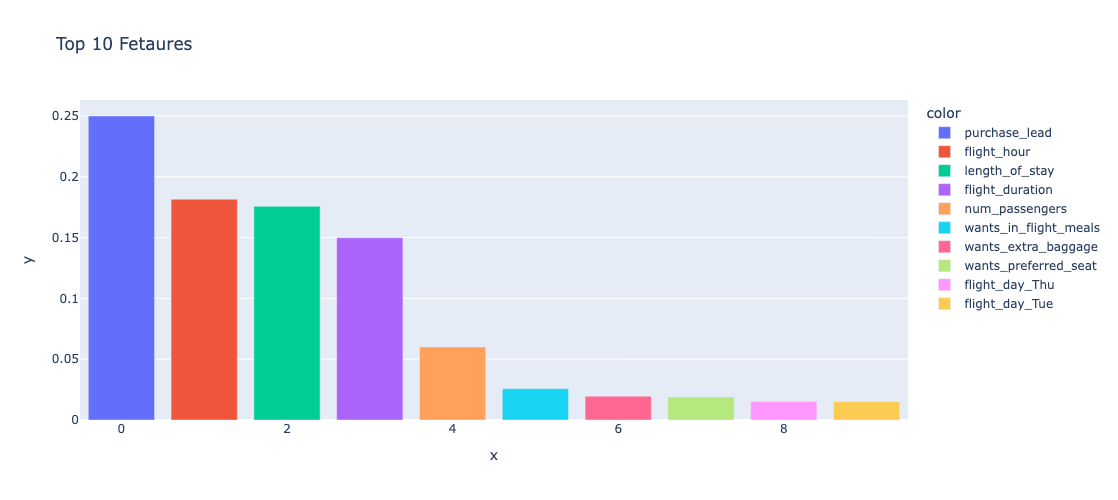

In [1160]:
px.bar(y=fets['Importance'],color=fets.Feature,title="Top 10 Fetaures",width=1000,height=500)

# Final Result

## we have achived max accuracy of 
## "train" ->90% and "test" -> ~85% using ""RandomForest""
## RandomForestClassifier(max_depth=23, n_estimators=200, n_jobs=-1, random_state=42)